In [45]:
import numpy as np 
import pandas as pd

In [46]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
ls

df2.pkl  df.pkl*          master_df_final.pkl  velocity.txt
df3.pkl  master_df_1.pkl  velocity.csv         wl.txt


In [48]:
df_flux = pd.read_pickle("master_df_1.pkl")
df_flux["Flux"]

0       [0.8374557793140411, 0.8236213773488998, 0.827...
1       [0.8208437860012054, 0.8302142471075058, 0.836...
2       [0.8190981149673462, 0.8272035270929337, 0.827...
3       [0.8452433347702026, 0.8275009244680405, 0.831...
4       [0.8192104995250702, 0.827963575720787, 0.8273...
                              ...                        
6671    [0.8111609816551208, 0.8102160096168518, 0.804...
6672    [0.8007028698921204, 0.7920275777578354, 0.811...
6673    [0.8169286847114563, 0.8064793795347214, 0.816...
6674    [0.8077016472816467, 0.7986242771148682, 0.813...
6675    [0.7946639657020569, 0.8095797151327133, 0.803...
Name: Flux, Length: 6676, dtype: object

In [49]:
df = pd.read_pickle("master_df_final.pkl")
df

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,MJD-Obs,Date-Obs
ADP.2014-09-29T13:27:17.100,0.837456,0.823621,0.827436,0.831259,0.835116,0.826492,0.823784,0.828894,0.819524,0.831311,...,0.915238,0.913326,0.919205,0.917128,0.919129,0.915391,0.917405,0.918169,52940.375824,2003-10-28T09:01:11.234
ADP.2014-09-29T13:27:14.610,0.820844,0.830214,0.836748,0.828794,0.830047,0.834472,0.831560,0.826273,0.824069,0.829600,...,0.915389,0.914821,0.921181,0.923494,0.921855,0.914253,0.919482,0.915859,52940.377579,2003-10-28T09:03:42.786
ADP.2014-09-29T13:27:19.680,0.819098,0.827204,0.827197,0.825538,0.833721,0.824589,0.833975,0.826998,0.827212,0.825584,...,0.916505,0.920153,0.913216,0.911216,0.915448,0.923467,0.914963,0.920705,52941.379180,2003-10-29T09:06:01.147
ADP.2014-09-29T13:27:08.827,0.845243,0.827501,0.831953,0.828898,0.831869,0.831781,0.826940,0.832694,0.823826,0.826778,...,0.915845,0.917230,0.912864,0.918247,0.918651,0.911695,0.920227,0.921852,52941.380924,2003-10-29T09:08:31.839
ADP.2014-09-29T13:27:06.927,0.819210,0.827964,0.827384,0.837609,0.827829,0.826034,0.835372,0.820015,0.844287,0.829866,...,0.918834,0.920203,0.917090,0.927455,0.911585,0.908550,0.915702,0.921109,52942.148931,2003-10-30T03:34:27.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADP.2020-03-16T01:25:54.868,0.811161,0.810216,0.804042,0.806117,0.816941,0.802496,0.804587,0.809815,0.805387,0.814125,...,0.934555,0.944543,0.938297,0.931623,0.933690,0.941317,0.942154,0.943022,58923.169110,2020-03-15T04:03:31.109
ADP.2020-03-16T01:25:54.870,0.800703,0.792028,0.811487,0.801885,0.818235,0.812957,0.800912,0.805432,0.809982,0.809695,...,0.926667,0.946139,0.943656,0.943805,0.941666,0.937213,0.952686,0.959267,58923.170222,2020-03-15T04:05:07.165
ADP.2020-03-16T01:25:54.872,0.816929,0.806479,0.816827,0.808939,0.819426,0.828124,0.813629,0.815418,0.816412,0.815271,...,0.932625,0.936470,0.931544,0.935279,0.944310,0.943487,0.940348,0.944231,58923.171334,2020-03-15T04:06:43.220
ADP.2020-03-16T01:25:54.874,0.807702,0.798624,0.813674,0.809490,0.808121,0.800481,0.825251,0.810596,0.816366,0.807727,...,0.937575,0.937990,0.936640,0.936352,0.931533,0.935989,0.939553,0.935566,58923.172443,2020-03-15T04:08:19.055


In [50]:
#GPT

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Load the Data
df = pd.read_pickle("master_df_final.pkl")

In [52]:
# 2. Extract the Flux Data (columns 0 to 1169)
flux_data = df.iloc[:, 0:1170].values
# 3. Normalize the Flux Data
scaler = MinMaxScaler()
flux_normalized = scaler.fit_transform(flux_data)

In [58]:
flux_data

array([[0.83745578, 0.82362138, 0.82743567, ..., 0.91539133, 0.91740521,
        0.91816886],
       [0.82084379, 0.83021425, 0.83674765, ..., 0.91425329, 0.91948164,
        0.91585855],
       [0.81909811, 0.82720353, 0.8271968 , ..., 0.9234671 , 0.91496267,
        0.92070472],
       ...,
       [0.81692868, 0.80647938, 0.81682694, ..., 0.94348655, 0.94034783,
        0.94423066],
       [0.80770165, 0.79862428, 0.81367419, ..., 0.93598916, 0.93955261,
        0.93556555],
       [0.79466397, 0.80957972, 0.80300701, ..., 0.94303983, 0.95129259,
        0.94847836]])

In [57]:
flux_normalized

array([[0.8711776 , 0.75648169, 0.80305893, ..., 0.1559594 , 0.1960694 ,
        0.1885116 ],
       [0.69439863, 0.8416681 , 0.90961753, ..., 0.13958926, 0.22849036,
        0.15471886],
       [0.67582182, 0.80276661, 0.80032544, ..., 0.27212622, 0.15793204,
        0.22560334],
       ...,
       [0.65273551, 0.53499008, 0.6816613 , ..., 0.56009813, 0.55429138,
        0.56971464],
       [0.55454464, 0.43349437, 0.64558383, ..., 0.45225113, 0.54187488,
        0.44297108],
       [0.41580223, 0.57504949, 0.52351732, ..., 0.55367228, 0.72518095,
        0.63184536]])

In [59]:
flux_normalized.shape[1]

1170

In [61]:
input_dim

1170

In [53]:
# 4. Define the Autoencoder
input_dim = flux_normalized.shape[1]
input_layer = Input(shape=(input_dim,))

In [54]:
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

#Dense: A fully connected neural network layer. The numbers (128, 64, 32) represent the number of neurons in each layer.
#activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity.

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

#The decoder mirrors the encoder but in reverse.
#activation='sigmoid': The final layer uses the sigmoid function to ensure the output values are between 0 and 1,
#matching the normalized input data.

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse') #Mean Squared Error

# 5. Train the Autoencoder
autoencoder.fit(flux_normalized, flux_normalized, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_split=0.2)

#fit: Trains the model.

#    flux_normalized: Both the input and target are the same since it's an autoencoder.
#    epochs=50: The model will iterate over the entire dataset 50 times.
#    batch_size=256: Number of samples per gradient update.
#    shuffle=True: Shuffles the data before each epoch to reduce overfitting.
#    validation_split=0.2: Uses 20% of the data for validation to monitor the model's performance on unseen data

Epoch 1/50
21/21 [==============================] - 2s 24ms/step - loss: 0.0219 - val_loss: 0.0127
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 4/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0095 - val_loss: 0.0103
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0094 - val_loss: 0.0102
Epoch 6/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0094 - val_loss: 0.0102
Epoch 7/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0093 - val_loss: 0.0102
Epoch 8/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0092 - val_loss: 0.0102
Epoch 9/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0091 - val_loss: 0.0100
Epoch 10/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0088 - val_loss: 0.0099
Epoch 11/

In [55]:
# 6. Detect Anomalies
reconstructed_flux = autoencoder.predict(flux_normalized)
mse = np.mean(np.power(flux_normalized - reconstructed_flux, 2), axis=1)

#mse: Calculates the Mean Squared Error (MSE) between the original and reconstructed data for each observation.
#High MSE indicates a poor reconstruction, which could signal an anomaly.

# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

#np.percentile(mse, 95): Determines the MSE value at the 95th percentile. 
#Observations with MSE above this threshold are considered anomalies.
#anomalies = mse > threshold: A boolean array where True indicates an anomaly.

209/209 [==============================] - 1s 3ms/step


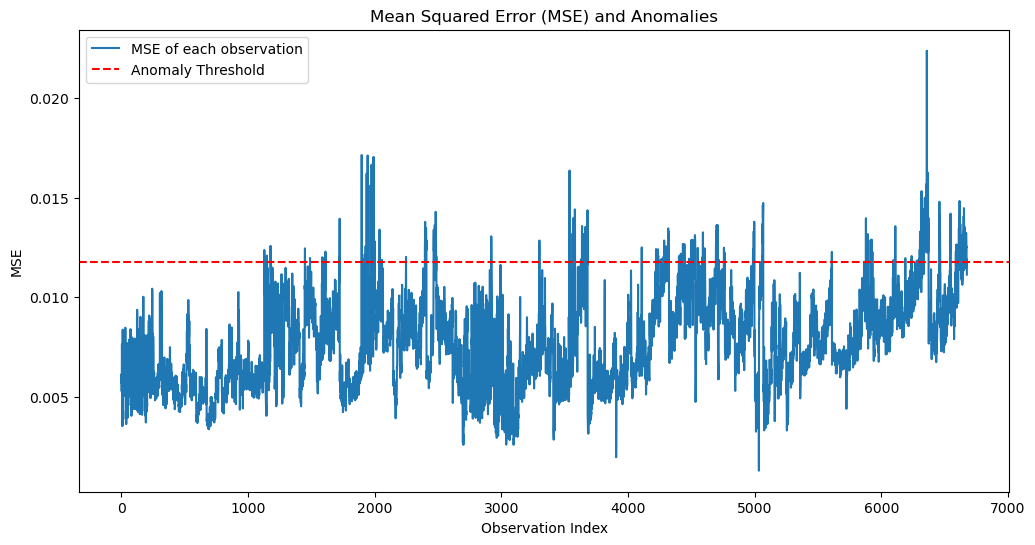

Anomalous Data Indices: [1128 1129 1149 1177 1178 1179 1449 1489 1586 1592 1611 1721 1723 1897
 1905 1913 1921 1928 1936 1944 1967 1975 1990 1998 2036 2038 2040 2057
 2247 2396 2397 2398 2399 2400 2402 2404 2405 2406 2407 2408 2465 2466
 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2480 2481
 2482 2483 2484 2486 2920 3300 3538 3545 3568 3580 3581 3628 3636 3637
 3638 3641 3642 3647 3649 3654 3664 3668 3670 3671 3674 3675 3676 3677
 3680 4108 4221 4236 4238 4259 4265 4266 4268 4281 4282 4284 4285 4288
 4293 4299 4300 4302 4303 4304 4305 4306 4309 4313 4316 4317 4318 4319
 4320 4321 4322 4402 4416 4429 4430 4431 4433 4434 4435 4441 4442 4444
 4445 4447 4482 4498 4500 4501 4505 4506 4510 4512 4513 4516 4518 4519
 4526 4527 4528 4529 4530 4550 4587 4591 4604 4607 4693 4694 4695 4696
 4697 4699 4700 4701 4704 4705 4706 4707 4708 4709 4716 4757 4758 4762
 4763 4986 4987 4991 4992 4995 4996 4997 5045 5058 5059 5060 5061 5062
 5063 5064 5065 5066 5067 5609 5877 5878 5880 5881 58

In [56]:
# 7. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(mse, label='MSE of each observation')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Mean Squared Error (MSE) and Anomalies')
plt.xlabel('Observation Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 8. Analyze Anomalies
anomalous_data_indices = np.where(anomalies)[0]
print(f"Anomalous Data Indices: {anomalous_data_indices}")

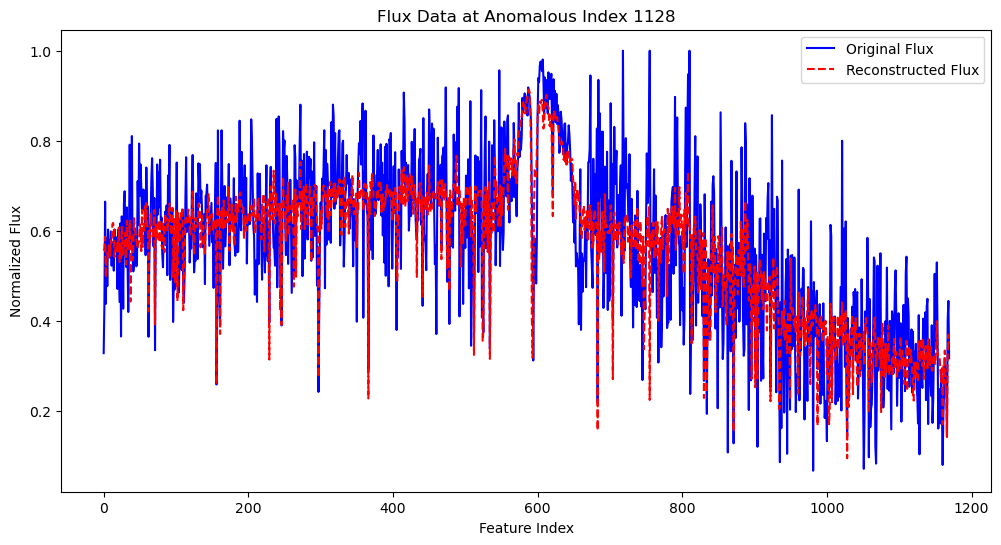

In [64]:
import matplotlib.pyplot as plt

# Index of the first anomaly
anomalous_index = 1128

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux
plt.figure(figsize=(12, 6))
plt.plot(original_flux, label='Original Flux', color='blue')
plt.plot(reconstructed_flux_at_index, label='Reconstructed Flux', color='red', linestyle='--')
plt.title(f'Flux Data at Anomalous Index {anomalous_index}')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


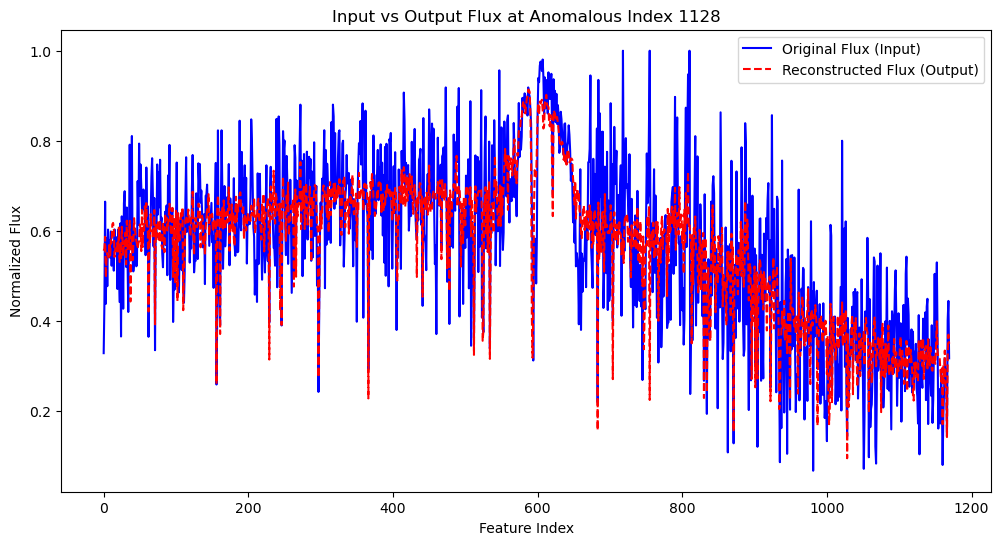

In [65]:
# Index of the first anomaly
anomalous_index = 1128

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux
plt.figure(figsize=(12, 6))
plt.plot(original_flux, label='Original Flux (Input)', color='blue')
plt.plot(reconstructed_flux_at_index, label='Reconstructed Flux (Output)', color='red', linestyle='--')
plt.title(f'Input vs Output Flux at Anomalous Index {anomalous_index}')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6676,) and (1170,)

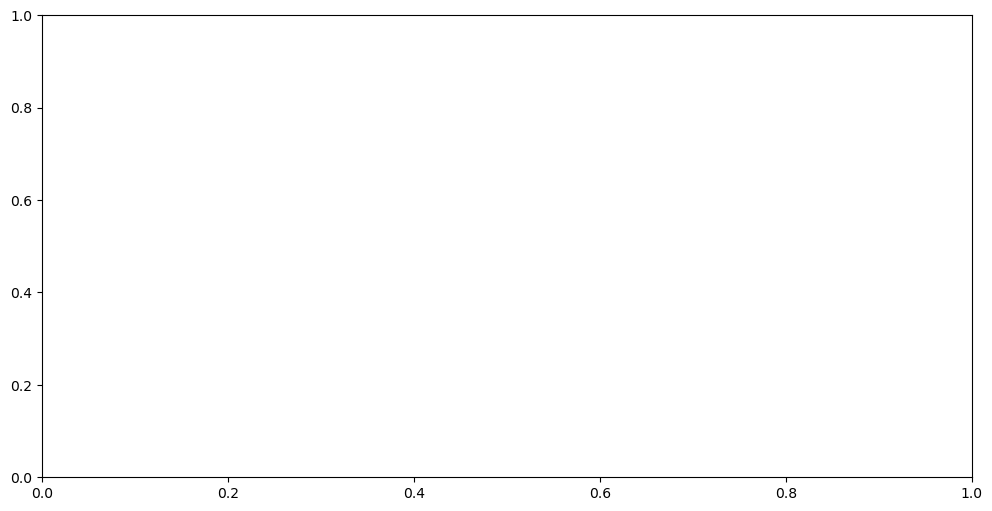

In [66]:
import matplotlib.pyplot as plt

# Index of the first anomaly
anomalous_index = 1128

# Extract the time data (assuming you use the 'MJD-Obs' column)
time_data = df["MJD-Obs"].values

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux against time
plt.figure(figsize=(12, 6))
plt.plot(time_data, original_flux, label='Original Flux (Input)', color='blue')
plt.plot(time_data, reconstructed_flux_at_index, label='Reconstructed Flux (Output)', color='red', linestyle='--')
plt.title(f'Time vs Flux at Anomalous Index {anomalous_index}')
plt.xlabel('Time (MJD-Obs)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


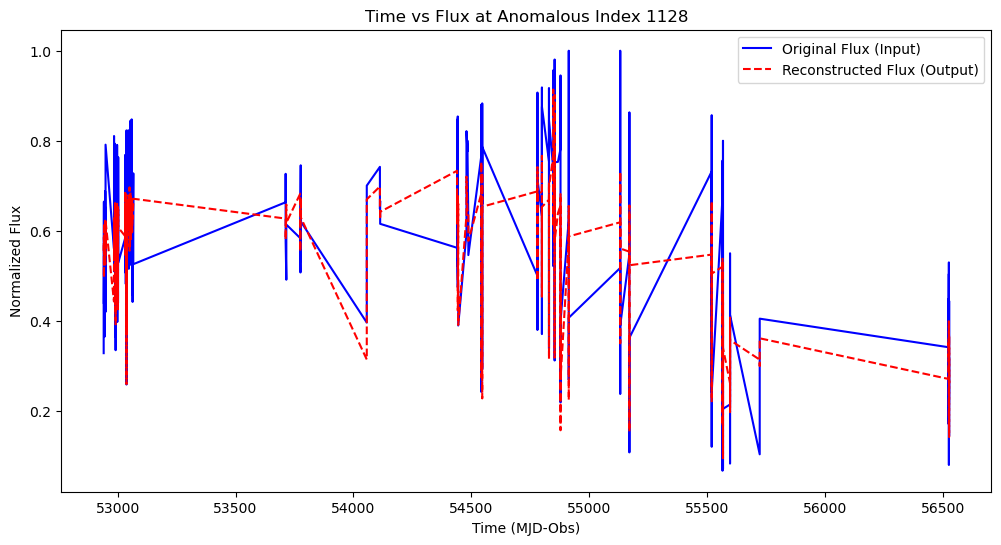

In [67]:
# Index of the first anomaly
anomalous_index = 1128

# Assuming the first 1170 time points correspond to the flux data
time_data_sliced = time_data[:1170]

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux against time
plt.figure(figsize=(12, 6))
plt.plot(time_data_sliced, original_flux, label='Original Flux (Input)', color='blue')
plt.plot(time_data_sliced, reconstructed_flux_at_index, label='Reconstructed Flux (Output)', color='red', linestyle='--')
plt.title(f'Time vs Flux at Anomalous Index {anomalous_index}')
plt.xlabel('Time (MJD-Obs)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


In [62]:
########################################################

In [63]:
from keras.models import Sequential
#can upload pretrained models from keras.models
from keras.layers import Dense,  Conv2D, MaxPooling2D
#create model
model = Sequential()

ndim= df.shape[0]

#
#x_train, x_test, y_train, y_test = train_test_split(
#    df, df, test_size=0.2, random_state=42 #Aqui se uso 80% train y 20% testing
#)

#create the model architecture by adding model layers
model.add(Dense(128, activation='relu', input_dim=(ndim)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(ndim, activation="linear"))


#need to choose the loss function, metric, optimization scheme
model.compile(optimizer='adam', loss='mean_squared_error')

##need to learn what to look for - always plot the loss function!
#model.fit(x_train, y_train, validation_data=(x_test, y_test),
#                     epochs=20, batch_size=100, verbose=1)

#note that the model allows to give a validation test, 
#this is for a 3fold cross valiation: train-validate-test 
#predict

#test_y_predictions = model.predict(validate_X)